### Counting dyed nucleus by using OpenCV
dir  
├OpenCV.ipynb(This file)  
└dir_data  
&emsp;&emsp;├dir_rawdata1  
&emsp;&emsp;│ ├rawdata_1.tif  
&emsp;&emsp;│ └rawdata_2.tif...etc  
&emsp;&emsp;├dir_rawdata2...etc  
&emsp;&emsp;└dir_output  
&emsp;&emsp;&emsp;├dir_contours  
&emsp;&emsp;&emsp;├dir_nucleus...etc  
&emsp;&emsp;&emsp;└nucleus.csv  


### 申請者が学部生の頃（2022年）に作成したOpenCVをもちいた細胞核認識プログラミング
#### ただし論文に載るものはこれに深層学習を加え、核の認識精度をさらに上げたものになる。
#### 上記したようなディレクトリ（フォルダ）を構成し、画像ファイルを一度に全て核の数をcsvにファイルごとに核の数を出力することが可能である。例えば、rawdata1（画像ファイル.tifを複数含む）とrawdata2（同左）の核数を比較したい場合、dataディレクトリ内に入れ、このプラグラムを走らせる。これだけですぐに解析を始めることができるような形でoutputディレクトリ内のcsvファイルに核数が記入されていく。もちろんこのプログラムは1つから、3つを超えるファイルであっても同様に利用することができる。さらに、数えた核を示した証拠となる画像も同様にoutputファイルに生成される。

#### 1枚の画像に対し以下のように画像を認識し数える

細胞数は276


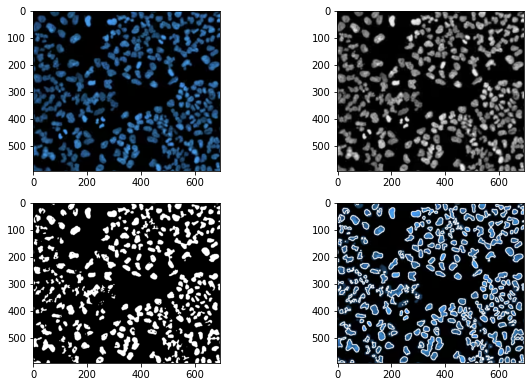

In [23]:
import cv2
import numpy as np
from IPython.display import Image #画像表示
 #複数枚表示
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
file = 'data1/DAPIsample/'
ext = '.png'
def pic(x):
    picturename=file+str(x)+ext
    return picturename
# 画像の読み込み
img = cv2.imread(pic(1))
img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(pic(2), img1)
threshold = 65
# 二値化(閾値を超えた画素を255にする。)
ret, img_thresh = cv2.threshold(img1, threshold, 255, cv2.THRESH_BINARY)
# 二値化画像の保存
cv2.imwrite(pic(3), img_thresh)

# 輪郭の描写
contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img4 = cv2.drawContours(img, contours, -1, (255, 255, 255), 2)
cv2.imwrite(pic(4), img4)
n=(len(contours))
print('細胞数は%d' % n)

 # 複数画像表示
image_path_list=[pic(1),pic(2),pic(3),pic(4)]
plt.figure(figsize=(10,10))
for i,d in enumerate(image_path_list):
    plt.subplot(3,2,i+1)
    plt.imshow(mpimg.imread(d),cmap="gray")

#### The version of Python and libraries used

In [1]:
#Confirm Python version
import sys
# Standard library
import os
import glob
# Third-party library
import cv2
import csv
import numpy as np

In [2]:
print('Python version :',sys.version.split()[0])
print('cv2 version :',cv2.__version__)
print('csv version :',csv.__version__)
print('numpy version :',np.__version__)

Python version : 3.8.8
cv2 version : 4.6.0
csv version : 1.0
numpy version : 1.20.1


#### Image input settings

In [3]:
# Specifying a folder
folder="#######" #Required
def tif(name): # Remove ".tif" when reading with os.
    inputfile = 'data/'+folder+'/'
    ext = '.tif'
    return inputfile+str(name)+ext

#### Image data preprocessing

In [4]:
# Removing noises
def noise(image,x):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (x, x))
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=2)
    return kernel,image

#### Reading raw data

In [5]:
paths=glob.glob( 'data/'+folder+'/*')
filenames=[]
for p in paths:
    name = os.path.splitext(os.path.basename(p))[0]
    filenames.append(name)
# Reading output directory name
directorynames=["grayscale","contrast","threshold","contours","nucleus","mask","noise"]
# Execute the following code once when the corresponding directory does not exist
"""
for directoryname in directorynames:
    os.mkdir(outputfile + str(directoryname))
"""
for filename in filenames:
    # Reading raw data files
    name=filename
    img = cv2.imread(tif(name))
    img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale conversion
    # write(name,img1,directorynames[0])

#### Creating a CSV file

In [6]:
with open('data/output/nucleus.csv', 'w') as f: # 上書きする''w
    writer = csv.writer(f)
    writer.writerow(["filename", "nucleus number", "white_area","black_area","white_area(%)","black_area(%)"])

#### Increasing the contrast of raw datas

In [7]:
t=10 #Required
s=2 #Required
x = np.arange(256)
y = np.clip(255 / (t - s) * x - 255 / (t - s) * s ,0, 255)
for filename in filenames:
    # Reading raw data files
    name=filename
    img = cv2.imread(tif(name))
    img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale conversion
    # write(name,img1,directorynames[0])
    
    
    # Increasing the contrast of raw datas
    img2 = cv2.LUT(img1, y)
    img2 = img2.astype(np.uint8) #Convert dtype('uint8')
    write(name,img2,directorynames[1])

#### Thresholding, Binarization, and Removing noises

In [8]:
t=10 #Required
s=2 #Required
x = np.arange(256)
y = np.clip(255 / (t - s) * x - 255 / (t - s) * s ,0, 255)
threshold = 55 #Required
for filename in filenames:
    # Reading raw data files
    name=filename
    img = cv2.imread(tif(name))
    img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale conversion
    # write(name,img1,directorynames[0])    
    img2 = cv2.LUT(img1, y)
    img2 = img2.astype(np.uint8) #Convert dtype('uint8')
    write(name,img2,directorynames[1])
    
    
    # Thresholding, Binarization, and Removing noises
    ret, img_thresh = cv2.threshold(img2, threshold, 255, cv2.THRESH_BINARY) # Binarization
    kernel,img_thresh=noise(img_thresh,5) # Removing noises
    #write(name, img_thresh,directorynames[6])

#### contour extraction

In [9]:
for filename in filenames:
    # Reading raw data files
    name=filename
    img = cv2.imread(tif(name))
    img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale conversion
    # write(name,img1,directorynames[0])    
    img2 = cv2.LUT(img1, y)
    img2 = img2.astype(np.uint8) #Convert dtype('uint8')
    write(name,img2,directorynames[1])   
    ret, img_thresh = cv2.threshold(img2, threshold, 255, cv2.THRESH_BINARY) # Binarization
    kernel,img_thresh=noise(img_thresh,5) # Removing noises
    #write(name, img_thresh,directorynames[6])
    
    
    # contour extraction
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img5 = cv2.drawContours(img, contours, -1, (25, 255, 255), 2)
    write(name,img5,directorynames[3])

#### Counting the number of contours

In [10]:
for filename in filenames:
    # Reading raw data files
    name=filename
    img = cv2.imread(tif(name))
    img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale conversion
    # write(name,img1,directorynames[0])    
    img2 = cv2.LUT(img1, y)
    img2 = img2.astype(np.uint8) #Convert dtype('uint8')
    write(name,img2,directorynames[1])   
    ret, img_thresh = cv2.threshold(img2, threshold, 255, cv2.THRESH_BINARY) # Binarization
    kernel,img_thresh=noise(img_thresh,5) # Removing noises
    #write(name, img_thresh,directorynames[6])
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img5 = cv2.drawContours(img, contours, -1, (25, 255, 255), 2)
    write(name,img5,directorynames[3])
    
    
    # Counting the number of contours
    n=len(contours)
    # Point at the centroid of the contour
    for i, cnt in enumerate(contours):
        # Calculating the moments of the contour
        M = cv2.moments(cnt)
        # Calculating the centroid from moments
        cx = M["m10"] / (M["m00"]+10**-10)
        cy = M["m01"] / (M["m00"]+10**-10)
        area = cv2.contourArea(cnt)
        img5=cv2.circle(img5, (int(cx),int(cy)), 5, (200, 60, 255), thickness=-1)
    #write(name,img5,directorynames[4])

#### Calculating the nuclear area ratio

In [11]:
for filename in filenames:
    # Reading raw data files
    name=filename
    img = cv2.imread(tif(name))
    img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale conversion
    # write(name,img1,directorynames[0])    
    img2 = cv2.LUT(img1, y)
    img2 = img2.astype(np.uint8) #Convert dtype('uint8')
    write(name,img2,directorynames[1])   
    ret, img_thresh = cv2.threshold(img2, threshold, 255, cv2.THRESH_BINARY) # Binarization
    kernel,img_thresh=noise(img_thresh,5) # Removing noises
    #write(name, img_thresh,directorynames[6])
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img5 = cv2.drawContours(img, contours, -1, (25, 255, 255), 2)
    write(name,img5,directorynames[3])
    n=len(contours)
    # Point at the centroid of the contour
    for i, cnt in enumerate(contours):
        # Calculating the moments of the contour
        M = cv2.moments(cnt)
        # Calculating the centroid from moments
        cx = M["m10"] / (M["m00"]+10**-10)
        cy = M["m01"] / (M["m00"]+10**-10)
        area = cv2.contourArea(cnt)
        img5=cv2.circle(img5, (int(cx),int(cy)), 5, (200, 60, 255), thickness=-1)
    #write(name,img5,directorynames[4])
    
    
    # Calculating the nuclear area ratio
    # Total number of pixels
    whole_area=img_thresh.size
    # Number of white pixels
    white_area=cv2.countNonZero(img_thresh)
    print('White_Area='+str(white_area))
    # Number of black pixels
    black_area=whole_area-white_area
    # Showing the respective ratios
    print('White_Area='+str(white_area/whole_area*100)+'%')
    print('Black_Area='+str(black_area/whole_area*100)+'%')

#### Write to a CSV file

In [12]:
for filename in filenames:
    # Reading raw data files
    name=filename
    img = cv2.imread(tif(name))
    img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscale conversion
    # write(name,img1,directorynames[0])    
    img2 = cv2.LUT(img1, y)
    img2 = img2.astype(np.uint8) #Convert dtype('uint8')
    write(name,img2,directorynames[1])   
    ret, img_thresh = cv2.threshold(img2, threshold, 255, cv2.THRESH_BINARY) # Binarization
    kernel,img_thresh=noise(img_thresh,5) # Removing noises
    #write(name, img_thresh,directorynames[6])
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img5 = cv2.drawContours(img, contours, -1, (25, 255, 255), 2)
    write(name,img5,directorynames[3])
    n=len(contours)
    # Point at the centroid of the contour
    for i, cnt in enumerate(contours):
        # Calculating the moments of the contour
        M = cv2.moments(cnt)
        # Calculating the centroid from moments
        cx = M["m10"] / (M["m00"]+10**-10)
        cy = M["m01"] / (M["m00"]+10**-10)
        area = cv2.contourArea(cnt)
        img5=cv2.circle(img5, (int(cx),int(cy)), 5, (200, 60, 255), thickness=-1)
    #write(name,img5,directorynames[4])
     # Total number of pixels
    whole_area=img_thresh.size
    # Number of white pixels
    white_area=cv2.countNonZero(img_thresh)
    print('White_Area='+str(white_area))
    # Number of black pixels
    black_area=whole_area-white_area
    # Showing the respective ratios
    print('White_Area='+str(white_area/whole_area*100)+'%')
    print('Black_Area='+str(black_area/whole_area*100)+'%')
    
    
    # Write to a CSV file
    with open('data/output/nucleus.csv', 'a') as f: # "a"は追記モード
        writer = csv.writer(f)
        writer.writerow([name, n, white_area, black_area, white_area/whole_area*100, black_area/whole_area*100])
    print(n)